In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from sklearn.datasets import fetch_20newsgroups

categories = ["alt.atheism",
             "talk.religion.misc"]

data = fetch_20newsgroups(subset= "train", categories=categories)

X1 = data['data']
y = data['target']

In [3]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [4]:
ind = np.random.randint(len(X1))
print("Category:",categories[y[ind]])
print(X1[ind])

Category: alt.atheism
From: west@next02cville.wam.umd.edu (Stilgar)
Subject: Re: Gospel Dating
Nntp-Posting-Host: next15csc.wam.umd.edu
Reply-To: west@next02.wam.umd.edu
Organization: Workstations at Maryland, University of Maryland, College Park
Lines: 35

In article <kmr4.1433.734039535@po.CWRU.edu> kmr4@po.CWRU.edu (Keith M.  
Ryan) writes:
> In article <1993Apr5.163050.13308@wam.umd.edu>  
west@next02cville.wam.umd.edu (Stilgar) writes:
> >In article <kmr4.1422.733983061@po.CWRU.edu> kmr4@po.CWRU.edu (Keith M.  
> >Ryan) writes:
> >> In article <1993Apr5.025924.11361@wam.umd.edu>  
> >west@next02cville.wam.umd.edu (Stilgar) writes:
> >> 
> >> >THE ILLIAD IS THE UNDISPUTED WORD OF GOD(tm)    *prove me wrong*
> >> 
> >> 	I dispute it.
> >> 
> >> 	Ergo: by counter-example: you are proven wrong.
> >
> >	I dispute your counter-example
> >
> >	Ergo: by counter-counter-example: you are wrong and
> >	I am right so nanny-nanny-boo-boo TBBBBBBBTTTTTTHHHHH
> 
> 	No. The premis stated that it 

In [5]:
print("Number of messages:", len(X1))

Number of messages: 857


In [6]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 125

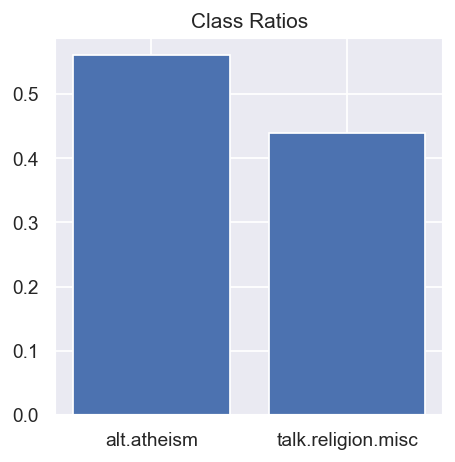

In [7]:
# Class Balance:
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(4,4))
plt.bar(unique,counts/len(y))
plt.xticks(unique,categories)
plt.title("Class Ratios")
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer()

X = tfidf.fit_transform(X1)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from inspect import signature

print(signature(LogisticRegression))
print(signature(SVC))

(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)


In [53]:
# Logistic Regression

logregModel = LogisticRegression(multi_class = "auto", 
                                 solver = "lbfgs", 
                                 max_iter = 1000) 
print(X.shape)

print(y.shape)



# Support Vector Machine

svcModel = SVC(gamma = "auto",
               kernel= "linear",
               C = 1.0)
               
print(X.shape)

print(y.shape)

(857, 18089)
(857,)
(857, 18089)
(857,)


In [54]:
logregModel.fit(X, y)
svcModel.fit(X, y)

SVC(gamma='auto', kernel='linear')

In [57]:
from sklearn.metrics import accuracy_score


ypred = logregModel.predict(X)
print("Logistic Regression Scores:",accuracy_score(y, ypred))


from sklearn.metrics import accuracy_score
ypred = svcModel.predict(X)
print("Support Vector Machine Scores:",accuracy_score(y, ypred))

Logistic Regression Scores: 0.9859976662777129
Support Vector Machine Scores: 0.9964994165694282


## Train_Test_Split

In [58]:
from sklearn.model_selection import train_test_split

# 80%-20% split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size = 0.2,
                                                random_state=12)

In [59]:
#Logistic Regression - Train

logregModel.fit(Xtrain, ytrain)

#Performance evaluation with the test set
ypred = logregModel.predict(Xtest)
print(accuracy_score(ytest, ypred))
print()
print(ytest)
print(ypred)

0.9534883720930233

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1]


In [60]:
#Support Vector Machine - Train

svcModel.fit(Xtrain, ytrain)

#Performance evaluation with the test set
ypred = svcModel.predict(Xtest)
print(accuracy_score(ytest, ypred))
print()
print(ytest)
print(ypred)

0.9593023255813954

[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1]
[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0
 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1]


## K-Fold Validation & Cross Validation

In [61]:
#Cross Validation

from sklearn.model_selection import cross_val_score
crossValScores = cross_val_score(logregModel, X, y, cv = 5)
print("Logistic Regression Scores: ", crossValScores)
print("Logistic Regression Mean and 2 std: %0.2f (+/- %0.2f)"% (crossValScores.mean(), crossValScores.std() * 2))


from sklearn.model_selection import cross_val_score
crossValScores = cross_val_score(svcModel, X, y, cv = 5)
print("SVC Scores: ", crossValScores)
print("SVC Mean and 2 std: %0.2f (+/- %0.2f)"% (crossValScores.mean(), crossValScores.std() * 2))

Logistic Regression Scores:  [0.91860465 0.94767442 0.92982456 0.95906433 0.90643275]
Logistic Regression Mean and 2 std: 0.93 (+/- 0.04)
SVC Scores:  [0.93023256 0.96511628 0.95321637 0.98245614 0.93567251]
SVC Mean and 2 std: 0.95 (+/- 0.04)


In [62]:
# K-Fold Cross Validation
from sklearn.model_selection import ShuffleSplit, KFold

# Reset the random seed
import time
np.random.seed(int(time.time()))

In [63]:
#Logistic Regression Random Splitting and Shuffling

# Random Splitting 75-25 5 times:
cv = ShuffleSplit(n_splits = 5, test_size = 0.25)
print("LOGREG Shuffle Split: ")
print(cross_val_score(logregModel, X, y, cv=cv))
print()

# Random shuffling than dividing into 5 folds 
cv = KFold(n_splits = 5, shuffle = True)
print("LOGREG Shuffled K-Fold Split: ")
print(cross_val_score(logregModel, X, y, cv = cv))

LOGREG Shuffle Split: 
[0.92093023 0.92093023 0.93953488 0.92093023 0.93953488]

LOGREG Shuffled K-Fold Split: 
[0.91860465 0.91860465 0.92982456 0.93567251 0.94152047]


In [64]:
# Random Splitting 75-25 5 times:
cv1 = ShuffleSplit(n_splits = 5, test_size = 0.25)
print("SVC Shuffle Split: ")
print(cross_val_score(svcModel, X, y, cv=cv))
print()

# Random shuffling than dividing into 5 folds 
cv1= KFold(n_splits = 5, shuffle = True)
print("SVC Shuffled K-Fold Split: ")
print(cross_val_score(svcModel, X, y, cv = cv))

SVC Shuffle Split: 
[0.94186047 0.94186047 0.94152047 0.92982456 0.96491228]

SVC Shuffled K-Fold Split: 
[0.96511628 0.94767442 0.95906433 0.92397661 0.94152047]


In [65]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

# Logistic Regression Stratified Shuffle Split
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.25)
print("LOGREG Stratified Shuffle Split: ")
print(cross_val_score(logregModel, X, y, cv = cv))

cv = StratifiedKFold(n_splits = 5, shuffle = True)
print("LOGREG Stratified K-Fold Split: ")
print(cross_val_score(logregModel, X, y, cv = cv))

LOGREG Stratified Shuffle Split: 
[0.91627907 0.88837209 0.91162791 0.93023256 0.93023256]
LOGREG Stratified K-Fold Split: 
[0.91860465 0.94186047 0.92397661 0.91812865 0.9122807 ]


In [66]:
# Support Vector Machine Stratified Shuffle Split

cv1 = StratifiedShuffleSplit(n_splits = 5, test_size = 0.25)
print("SVC Stratified Shuffle Split: ")
print(cross_val_score(svcModel, X, y, cv = cv))

cv1 = StratifiedKFold(n_splits = 5, shuffle = True)
print("SVC Stratified K-Fold Split: ")
print(cross_val_score(svcModel, X, y, cv = cv))

SVC Stratified Shuffle Split: 
[0.94186047 0.93023256 0.96491228 0.97076023 0.95906433]
SVC Stratified K-Fold Split: 
[0.95930233 0.95348837 0.93567251 0.95906433 0.95321637]


In [67]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(logregModel, X, y, cv = cv)
print(scores.mean())

scores = cross_val_score(svcModel, X, y, cv = cv)
print(scores.mean())

0.9299883313885647
0.9603267211201867


##  Hyperparameter Selection

In [68]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform as sp_uniform
from sklearn.metrics import accuracy_score, auc

np.random.seed(int(time.time()))

cv = StratifiedKFold(n_splits = 5, shuffle = True)

paramsToTest_logreg = {"C": [0.1, 0.5, 1.0, 2.5, 5.0],
                "solver": ["sag", "lbfgs"]}
                

gscv = GridSearchCV(LogisticRegression(multi_class = "auto",  
                                       max_iter = 50), 
                    paramsToTest_logreg, cv = cv, return_train_score = True)


gscv.fit(X, y)

print(gscv.best_params_)
print("LOGREGBest C:", gscv.best_estimator_.C)
print("LOGREG Best solver:", gscv.best_estimator_.solver)

/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/ideakadikoy/Desktop/anaconda3/lib/pyt

{'C': 5.0, 'solver': 'sag'}
LOGREGBest C: 5.0
LOGREG Best solver: sag


/Users/ideakadikoy/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [69]:
from sklearn.model_selection import GridSearchCV

np.random.seed(int(time.time()))

cv = StratifiedKFold(n_splits = 5, shuffle = True)

paramsToTest_SVC= {"kernel": ["poly", "rbf", "linear"],
                "degree": [1, 2, 3, 4, 5]}

gscv1 = GridSearchCV(SVC(gamma = "scale"),
                              paramsToTest_SVC, 
                              cv = cv,
                              return_train_score = True)

gscv1.fit(X, y)
print(gscv1.best_params_)
print("SVC Best C:", gscv1.best_estimator_.kernel)
print("SVC Best solver:", gscv1.best_estimator_.degree)

{'degree': 1, 'kernel': 'poly'}
SVC Best C: poly
SVC Best solver: 1


## Model Evulation

In [73]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, stratify = y)

cv1= KFold(n_splits = 5, shuffle = True)
 
    
paramsToTest = {"C": [0.001, 0.01, 0.1, 1, 10, 25],
              "kernel": ["poly", "rbf", "linear"],
              "gamma": ["scale","auto"],
              "degree": [1, 2, 3, 4, 5]}

rscv = RandomizedSearchCV(SVC(gamma = "scale"), paramsToTest, 
                          cv = cv, n_iter = 50, return_train_score = True)

rscv.fit(Xtrain, ytrain)
ypred = rscv.predict(Xtest)

print("Kernel:", rscv.best_estimator_.kernel)
print("C:", rscv.best_estimator_.C)
print("Accuracy:", accuracy_score(ytest, ypred))

Kernel: linear
C: 10
Accuracy: 0.9593023255813954


In [74]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.95      0.96      0.95        76

    accuracy                           0.96       172
   macro avg       0.96      0.96      0.96       172
weighted avg       0.96      0.96      0.96       172



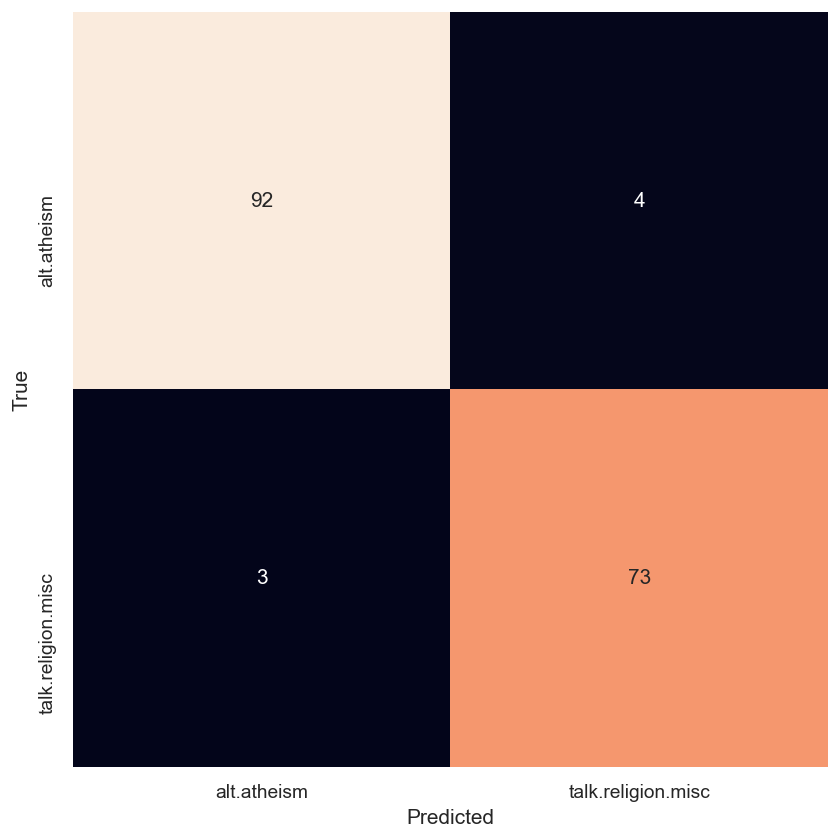

In [78]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, ypred)
plt.figure(figsize = (12, 8))
sns.heatmap(mat, square = True, annot = True, fmt = "d", cbar = False,
            xticklabels = data["target_names"], yticklabels = data["target_names"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [76]:
mat

array([[92,  4],
       [ 3, 73]])

In [80]:
# Test Set Performance
print(f"SVM Test Performance:{rscv.score(Xtest,ytest):.3f}")

SVM Test Performance:0.959
